# First Neural Network Experiement


## Pipeline Preparation

In [1]:
import numpy as np
import pandas as pd
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper, FunctionTransformer, gen_features, pipeline
from sklearn_pandas.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import xgboost as xgb
import os
import pitch_functions
import sklearn

In [2]:
each_pitch_clean = pd.read_csv('raw_data/master.csv')

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pitch_clean = each_pitch_clean.dropna().copy()

In [6]:
# Lost about 600, but this is just a test
pitch_clean.head()

,pitcher,WAR_x,WHIP,ERA,SO,hitter,SLG,OPS,WAR_y,about.atBatIndex,about.halfInning,about.inning,count.balls,count.strikes,details.call.code,details.call.description,details.description,matchup.batSide.code,matchup.pitchHand.code,matchup.pitcher.id,matchup.splits.menOnBase,pitchData.nastyFactor,pitchData.zone,pitchNumber,previous_pitch_code,pitch_type,prior_pitch_type
1,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,top,9,1.0,1.0,S,Strike - Swinging,Foul,R,R,434778,Men_On,32.94,1.0,2.0,CH,Changeup,Changeup
2,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,top,9,1.0,2.0,S,Strike - Swinging,Foul,R,R,434778,Men_On,31.44,4.0,3.0,CH,Breaking_Ball,Changeup
3,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,top,9,2.0,2.0,B,Ball - Called,Ball,R,R,434778,Men_On,2.66,14.0,4.0,SL,Breaking_Ball,Breaking_Ball
4,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,top,9,3.0,2.0,B,Ball - Called,Ball,R,R,434778,Men_On,3.82,14.0,5.0,CU,Breaking_Ball,Breaking_Ball
5,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,top,9,4.0,2.0,B,Ball - Called,Ball,R,R,434778,Men_On,35.64,11.0,6.0,CU,Breaking_Ball,Breaking_Ball


In [7]:
target = pitch_clean['pitch_type']

In [8]:
predictors = pitch_clean.drop(['pitch_type'], axis=1)

In [9]:
num_features = list(predictors.select_dtypes(exclude='object'))

In [10]:
numeric_transformer = Pipeline(steps=[('keeper', None)])

In [11]:
cat_features = list(predictors.select_dtypes(include='object'))

In [12]:
cat_transfomer = Pipeline(steps=[('onehot', OneHotEncoder())])

In [13]:
# preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),
#                                               ('cat', cat_transfomer, cat_features)])

In [14]:
# classifiers = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100, max_depth=5), 
#                GradientBoostingClassifier(n_estimators=100), xgb.XGBClassifier()]

## Model Creation

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=10)

## Neural Network

In [16]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer

Using TensorFlow backend.


In [17]:
# Spend today soley reading/learning about how to get data into a Neural Network, about which one you should use... etc
# By

## Data Prep for Neural Network 
- OHE Categorical Variables
- Standardize Numerical Variables

In [18]:
sklearn.__version__

'0.20.2'

In [19]:
encoder = OneHotEncoder()

In [20]:
cat_features = predictors[cat_features]

In [21]:
encoder.fit(cat_features)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [22]:
encoder.get_feature_names()

array(['x0_A.J. Cole', 'x0_A.J. Minter', 'x0_AJ Ramos', ...,
       'x10_Breaking_Ball', 'x10_Changeup', 'x10_Fastball'], dtype=object)

In [23]:
num_features = predictors[num_features]

In [24]:
cat = pd.DataFrame(encoder.transform(cat_features).toarray(),
                   columns=encoder.get_feature_names())


In [25]:
cat.head()

x0_A.J. Cole  x0_A.J. Minter  x0_AJ Ramos  x0_Aaron Brooks  \
0           0.0             0.0          0.0              0.0   
1           0.0             0.0          0.0              0.0   
2           0.0             0.0          0.0              0.0   
3           0.0             0.0          0.0              0.0   
4           0.0             0.0          0.0              0.0   

   x0_Aaron Bummer  x0_Aaron Loup  x0_Aaron Nola  x0_Aaron Sanchez  \
0              0.0            0.0            0.0               0.0   
1              0.0            0.0            0.0               0.0   
2              0.0            0.0            0.0               0.0   
3              0.0            0.0            0.0               0.0   
4              0.0            0.0            0.0               0.0   

   x0_Aaron Slegers  x0_Aaron Wilkerson  x0_Adalberto Mejia  x0_Adam Cimber  \
0               0.0                 0.0                 0.0             0.0   
1               0.0                 0.0                 0.0             0.0   
2               0.0                 0.0                 0.0             0.0   
3               0.0                 0.0                 0.0             0.0   
4               0.0                 0.0                 0.0             0.0   

   x0_Adam Conley  x0_Adam Kolarek  x0_Adam Liberatore  x0_Adam McCreery  \
0             0.0              0.0                 0.0               0.0   
1             0.0              0.0                 0.0               0.0   
2             0.0              0.0                 0.0               0.0   
3             0.0              0.0                 0.0               0.0   
4             0.0              0.0                 0.0               0.0   

   x0_Adam Morgan  x0_Adam Ottavino  x0_Adam Plutko  x0_Adam Wainwright  \
0             0.0               0.0             0.0                 0.0   
1             0.0               0.0             0.0                 0.0   
2             0.0               0.0             0.0                 0.0   
3             0.0               0.0             0.0                 0.0   
4             0.0               0.0             0.0                 0.0   

   x0_Adam Warren  x0_Addison Reed  x0_Adrian Houser  x0_Adrian Sampson  \
0             0.0              0.0               0.0                0.0   
1             0.0              0.0               0.0                0.0   
2             0.0              0.0               0.0                0.0   
3             0.0              0.0               0.0                0.0   
4             0.0              0.0               0.0                0.0   

   x0_Akeel Morris  x0_Alan Busenitz  x0_Alec Asher  x0_Alec Mills  \
0              0.0               0.0            0.0            0.0   
1              0.0               0.0            0.0            0.0   
2              0.0               0.0            0.0            0.0   
3              0.0               0.0            0.0            0.0   
4              0.0               0.0            0.0            0.0   

   x0_Alex Avila  x0_Alex Blandino  x0_Alex Claudio  x0_Alex Cobb  \
0            0.0               0.0              0.0           0.0   
1            0.0               0.0              0.0           0.0   
2            0.0               0.0              0.0           0.0   
3            0.0               0.0              0.0           0.0   
4            0.0               0.0              0.0           0.0   

   x0_Alex Colome  x0_Alex McRae  x0_Alex Reyes  x0_Alex Wilson  x0_Alex Wood  \
0             0.0            0.0            0.0             0.0           0.0   
1             0.0            0.0            0.0             0.0           0.0   
2             0.0            0.0            0.0             0.0           0.0   
3             0.0            0.0            0.0             0.0           0.0   
4             0.0            0.0            0.0             0.0           0.0   

   x0_Alexi Ogando  x0_Allen Webst

In [30]:
num_features.head(1)

,WAR_x,WHIP,ERA,SO,SLG,OPS,WAR_y,about.atBatIndex,about.inning,count.balls,count.strikes,matchup.pitcher.id,pitchData.nastyFactor,pitchData.zone,pitchNumber
1,0.0,1.0,0.0,0,0.508,0.864,8.2,70,9,1.0,1.0,434778,32.94,1.0,2.0


In [ ]:
# List of Normalish Distributions
#OPS
#WAR_y
#Nasty Factor
#Drop matchup.pitcher.id or drop all players in general

(array([  1529.,      0.,    408.,   1797.,      0.,  35902., 103745.,
         87515., 183931., 101446.]),
 array([112526. , 168636.7, 224747.4, 280858.1, 336968.8, 393079.5,
        449190.2, 505300.9, 561411.6, 617522.3, 673633. ]),
 <a list of 10 Patch objects>)

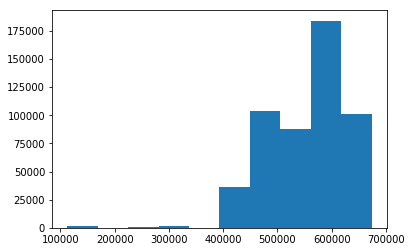

In [43]:
plt.hist(num_features['matchup.pitcher.id'])

In [54]:
col_names = list(num_features.columns)

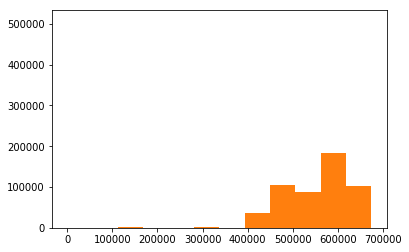

In [55]:
for i in col_names:
    plt.hist(num_features[i])